# Reading in Data from a Text File

## Standard Library

In [3]:
import numpy as np

In [4]:
def read_using_standard_library(filename):
    with open(filename, 'r') as open_file: #Open file in read only mode
        #Make a list where each element is a string containing one line in the file
        all_lines = open_file.readlines()
    #Initialize blank lists
    date = []
    storage_level = []
    for iline in all_lines:
        #ignore header
        if iline[0] != '#':
            #Split line on blank space (can supply an argument if you want something different (like comma))
            split_line = iline.split()
            #Append date and storage_level to appropriate lists
            date.append(split_line[0])
            storage_level.append(float(split_line[1])) #convert string to floating point before appending
    #Convert lists to numpy arrays
    date = np.array(date)
    storage_level = np.array(storage_level)
    return date, storage_level

In [5]:
nicasio_2006_date, nicasio_2006_storage = read_using_standard_library('data/n6.txt')
print nicasio_2006_date
print nicasio_2006_storage

['01/2006' '02/2006' '03/2006' '04/2006' '05/2006' '06/2006' '07/2006'
 '08/2006' '09/2006' '10/2006' '11/2006' '12/2006']
[ 22430.  22430.  22430.  22430.  22395.  21995.  21445.  21292.  20869.
  20698.  20809.  22430.]


------------------------

# Numpy

--------------------

## Read using Numpy

In [6]:
#Without any keywords, numpy assumes everything is a float and cannot convert
np.loadtxt('data/n6.txt')

ValueError: invalid literal for float(): 01/2006

In [7]:
#Without unpack, you get tuples of the row
np.loadtxt('data/n6.txt', dtype={'names': ['date', 'storage'], 
                                 'formats': ['S7', 'f8']})

array([('01/2006', 22430.0), ('02/2006', 22430.0), ('03/2006', 22430.0),
       ('04/2006', 22430.0), ('05/2006', 22395.0), ('06/2006', 21995.0),
       ('07/2006', 21445.0), ('08/2006', 21292.0), ('09/2006', 20869.0),
       ('10/2006', 20698.0), ('11/2006', 20809.0), ('12/2006', 22430.0)], 
      dtype=[('date', 'S7'), ('storage', '<f8')])

In [8]:
#With unpack, you get each column back
nicasio_2006_date, nicasio_2006_storage = np.loadtxt('data/n6.txt', unpack = True,  
                                                        dtype={'names': ['date', 'storage'], 
                                                               'formats': ['S7', 'f8']})


In [9]:
print 'date = ', nicasio_2006_date
print 'storage = ', nicasio_2006_storage

date =  ['01/2006' '02/2006' '03/2006' '04/2006' '05/2006' '06/2006' '07/2006'
 '08/2006' '09/2006' '10/2006' '11/2006' '12/2006']
storage =  [ 22430.  22430.  22430.  22430.  22395.  21995.  21445.  21292.  20869.
  20698.  20809.  22430.]


### Other Functions:

There are other better ways to read files, but these are specific to the file format and some are field specific.

I use <b><code>ascii</code></b> in the <b><code>astropy.io</code></b> package

You will see <b><code>pandas</code></b> in the next section

# Math with Numpy

There are many different date types in python and basic arithmatic operations such as + and \* operate differently on different ones. Here we will look at \* on a numpy array and a numpy matrix.

## With a Numpy Array

Numpy calls largely to C libraries to perform tasks. For this reason its array math is very quick

In [11]:
nicasio_2006_storage_double = nicasio_2006_storage*2
print nicasio_2006_storage
print nicasio_2006_storage_double

[ 22430.  22430.  22430.  22430.  22395.  21995.  21445.  21292.  20869.
  20698.  20809.  22430.]
[ 44860.  44860.  44860.  44860.  44790.  43990.  42890.  42584.  41738.
  41396.  41618.  44860.]


Numpy arrays operate element-wise. Note this is NOT a matrix. 

#### With 2D arrays

Numpy also tries to guess what you want to do. For instance, if you want have a 2D array and you want to multiply every column by a number:

In [12]:
array_of_ones = np.ones((5, 5))
number_array = np.arange(5).T
print 'array_of_ones = ', array_of_ones
print 'number_array = ', number_array
print 'product = ', array_of_ones*number_array

array_of_ones =  [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
number_array =  [0 1 2 3 4]
product =  [[ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]]


## With a Numpy Matrix

There is also a numpy matrix type which allows you to matrix math, including matrix multiplication and solving linear equations

In [13]:
matrix_of_ones = np.matrix(np.ones((5, 5)))
number_matrix = np.matrix(np.arange(5)).T
print 'Shape of matrix_of_ones = ', matrix_of_ones.shape
print 'Shape of number_matrix = ', number_matrix.shape
print 'matrix_of_ones = ', matrix_of_ones
print 'number_array = ',number_array
print 'product = ', matrix_of_ones*number_matrix

Shape of matrix_of_ones =  (5, 5)
Shape of number_matrix =  (5, 1)
matrix_of_ones =  [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
number_array =  [0 1 2 3 4]
product =  [[ 10.]
 [ 10.]
 [ 10.]
 [ 10.]
 [ 10.]]


## Other Useful Numpy Functions
#### Calculate the average reservoir levels at the Nicasio Reservoir

In [14]:
nicasio_2006_storage.mean()
#np.mean(nicasio_2006_storage, axis )

21804.416666666668

In [15]:
np.median(nicasio_2006_storage)
#You can also do np.mean(nicasio_2006_storage)

22195.0

#### Find the maximum or minimum

In [16]:
print nicasio_2006_storage.max()
print nicasio_2006_storage.min()

22430.0
20698.0


#### Find the sum

In [17]:
nicasio_2006_storage.sum()

261653.0

### Filtering arrays

In [18]:
nicasio_2006_storage > nicasio_2006_storage.mean()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True], dtype=bool)

This returns an array of booleans (True and False), which corresponds to every element in nicasio_2006_storage and whether that element meets the condition or not.

To select value which meet the condition:

In [19]:
print 'mean = ', nicasio_2006_storage.mean()
print nicasio_2006_storage[nicasio_2006_storage > nicasio_2006_storage.mean()]

mean =  21804.4166667
[ 22430.  22430.  22430.  22430.  22395.  21995.  22430.]


To get the indicies of where a condition is met:

In [20]:
indx = np.where(nicasio_2006_storage > nicasio_2006_storage.mean())
print indx

(array([ 0,  1,  2,  3,  4,  5, 11]),)


indexing into the array

In [21]:
nicasio_2006_storage[indx]

array([ 22430.,  22430.,  22430.,  22430.,  22395.,  21995.,  22430.])

Footnote 1: This is not the explicit purpose of the np.where statement. It is actually much more powerful, this is just the default behavior. When you are ready to learn more, you can look it up. 

Footnote 2: Using np.where on a list will always return an empty array even if your condition is met

## <a href = "http://docs.scipy.org/doc/numpy/reference/index.html">More information</a>

----------------------------

# Matplotlib

This is python's most used plotting library. It does just about everything a few different ways. This is both a strength and a weakness. We are going to cover the basics here. There will be more in the next session. 

The Matplotlib galary is full of examples: <a href = "http://matplotlib.org/gallery.html">http://matplotlib.org/gallery.html</a> and a list of plotting commands that I find useful to browse when I'm not quite sure what I'm looking for <a href = "http://matplotlib.org/api/pyplot_summary.html">http://matplotlib.org/api/pyplot_summary.html</a>

--------------------

In [22]:
#Load plotting backend
#Make plots inside notebook document
%matplotlib inline

In [23]:
from matplotlib import pyplot

## Convert date strings to something plotable

In [25]:
from datetime import datetime

nicasio_2006_date_datetime = []
for str_date in nicasio_2006_date:
    nicasio_2006_date_datetime.append(datetime.strptime(str_date,'%m/%Y'))

#Convert list to an array
nicasio_2006_date_datetime = np.array(nicasio_2006_date_datetime)
print nicasio_2006_date_datetime

[datetime.datetime(2006, 1, 1, 0, 0) datetime.datetime(2006, 2, 1, 0, 0)
 datetime.datetime(2006, 3, 1, 0, 0) datetime.datetime(2006, 4, 1, 0, 0)
 datetime.datetime(2006, 5, 1, 0, 0) datetime.datetime(2006, 6, 1, 0, 0)
 datetime.datetime(2006, 7, 1, 0, 0) datetime.datetime(2006, 8, 1, 0, 0)
 datetime.datetime(2006, 9, 1, 0, 0) datetime.datetime(2006, 10, 1, 0, 0)
 datetime.datetime(2006, 11, 1, 0, 0) datetime.datetime(2006, 12, 1, 0, 0)]


#### Write a function since we will want to do this for every file

In [27]:
def convert_string_to_datetime(date_array):
    date_datetime = []
    for str_date in date_array:
        date_datetime.append(datetime.strptime(str_date,'%m/%Y'))
    #Convert list to an array
    return np.array(date_datetime)

#### Most basic plot

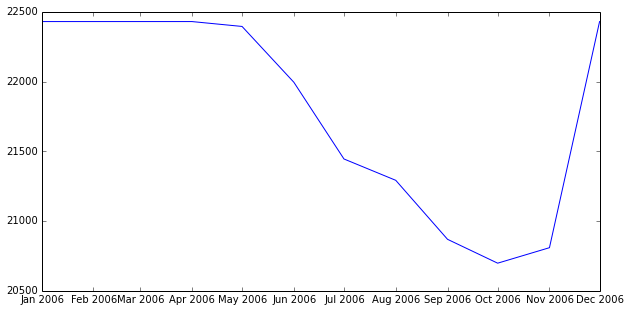

In [28]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage)

#### Add Symbols

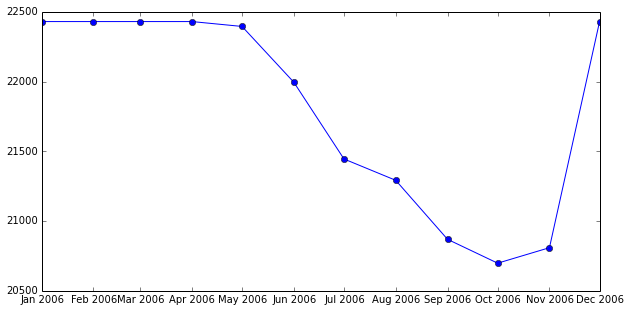

In [29]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o')

#### Make it a dashed line

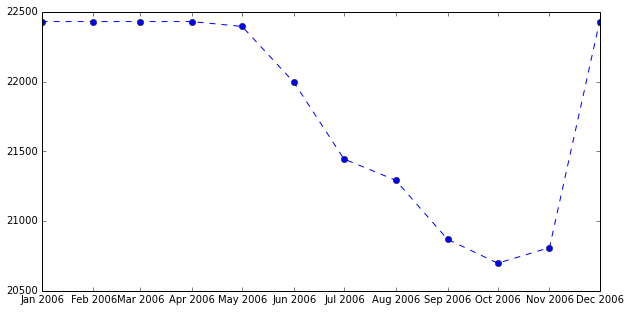

In [30]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = '--')

#### No line

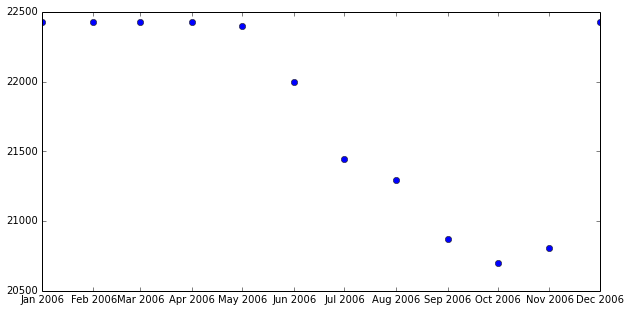

In [31]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = 'none')

Notice that that is a string 'none' not a Null Type None

#### Change the color of the symbols

There are some abbreviations for colors (e.g. 'r' = 'red'). Matplotlib also accepts RGB tuples, html colors, and word colors.

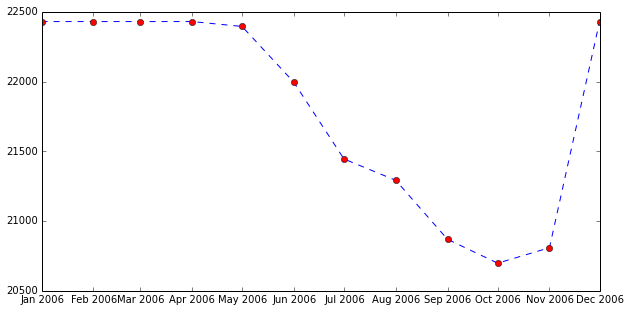

In [32]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = '--', 
        markerfacecolor = 'r')

#### Change line color

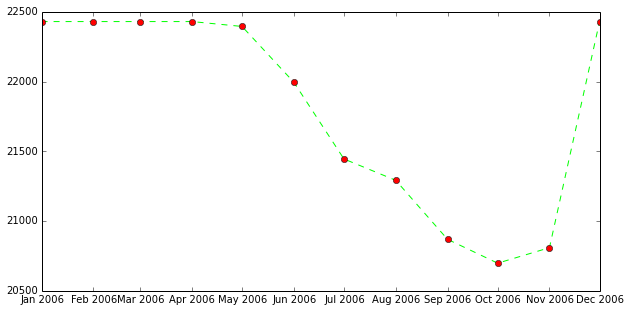

In [33]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = '--', 
        markerfacecolor = 'r',
        color = 'lime')

#### Label Axes

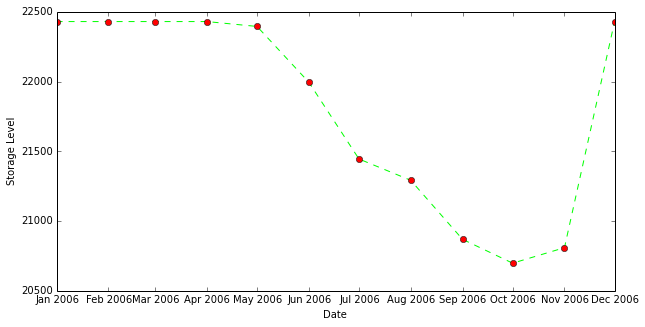

In [34]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = '--', 
        markerfacecolor = 'r',
        color = 'lime')
ax.set_xlabel('Date')
ax.set_ylabel('Storage Level')

#### Title Plot

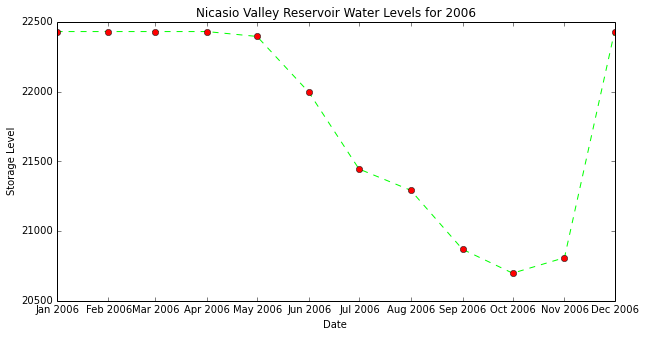

In [35]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = '--', 
        markerfacecolor = 'r',
        color = 'lime')
ax.set_xlabel('Date')
ax.set_ylabel('Storage Level')
ax.set_title('Nicasio Valley Reservoir Water Levels for 2006')

#### Change y limits

(10000, 22500)

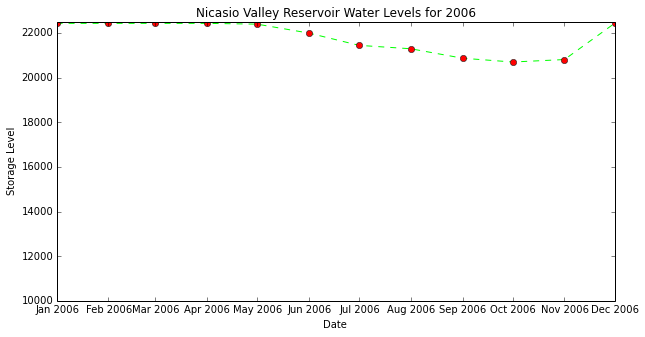

In [36]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = '--', 
        markerfacecolor = 'r',
        color = 'lime')
ax.set_xlabel('Date')
ax.set_ylabel('Storage Level')
ax.set_title('Nicasio Valley Reservoir Water Levels for 2006')
ax.set_ylim(10000, 22500)

#### Add another dataset

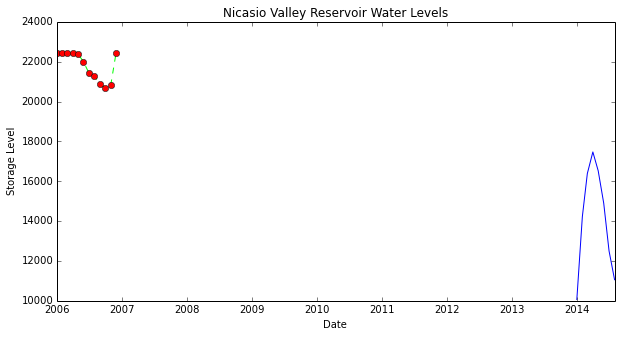

In [37]:
nicasio_2014_date, nicasio_2014_storage = np.loadtxt('data/n14.txt', unpack = True,  
                                                        dtype={'names': ['date', 'storage'], 
                                                               'formats': ['S7', 'f8']})
nicasio_2014_date_datetime = convert_string_to_datetime(nicasio_2014_date)

    
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = '--', 
        markerfacecolor = 'r',
        color = 'lime')
ax.set_xlabel('Date')
ax.set_ylabel('Storage Level')
ax.set_title('Nicasio Valley Reservoir Water Levels')
#Convert list to an array
nicasio_2014_date_datetime = np.array(nicasio_2014_date_datetime)

ax.plot(nicasio_2014_date_datetime, nicasio_2014_storage)

#### Add a legend

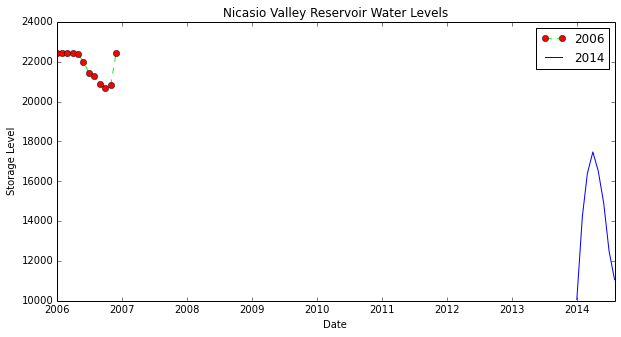

In [38]:
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
ax.plot(nicasio_2006_date_datetime, nicasio_2006_storage, 
        marker = 'o', 
        linestyle = '--', 
        markerfacecolor = 'r',
        color = 'lime',
        label = '2006')
ax.set_xlabel('Date')
ax.set_ylabel('Storage Level')
ax.set_title('Nicasio Valley Reservoir Water Levels')
#Convert list to an array
nicasio_2014_date_datetime = np.array(nicasio_2014_date_datetime)

ax.plot(nicasio_2014_date_datetime, nicasio_2014_storage, 
        label = '2014')
ax.legend(loc = 'best')

# Bonus: Putting it all together

### Make datetime conversion a function
    

In [ ]:
import glob
import os

file_list = glob.glob('data/n*.txt')
fig = pyplot.figure(figsize = [10, 5])
ax = fig.add_subplot(1,1,1)
#loop over each file
for ifile in file_list:
    #read in data
    date, storage = np.loadtxt(ifile, unpack = True,
                               dtype={'names': ['date', 'storage'], 
                               'formats': ['S7', 'f8']})
    #Convert string dates to datetime object
    date_datetime = convert_string_to_datetime(date)
    #Plot the data
    ax.plot(date_datetime, storage, 
        label = os.path.basename(ifile)) #stripe down the path to include just the file name
ax.set_xlabel('Date')
ax.set_ylabel('Storage Level')
ax.set_title('Nicasio Valley Reservoir Water Levels')
ax.legend(loc = 'best', ncol = 5)
ax.set_ylim(9000, 24000)

Here I modified the legend to have 5 columns instead of the default 1 and set the y limit so that the text didn't cover up lines I was plotting